# Partie Model

In [1]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go
import plotly.express as px

C:\Users\willi\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Importations
        We are going to run the exploration notebook in order to recover the cleaning_preparation function
        Then we 'll look at the types of data 

C:\Users\willi\AppData\Local\Temp\ipykernel_12812\1598430227.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Format'] = pd.to_datetime(df.Date, format = "%d/%m/%Y")
C:\Users\willi\AppData\Local\Temp\ipykernel_12812\1598430227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date_Format'].dt.year
C:\Users\willi\AppData\Local\Temp\ipykernel_12812\1598430227.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

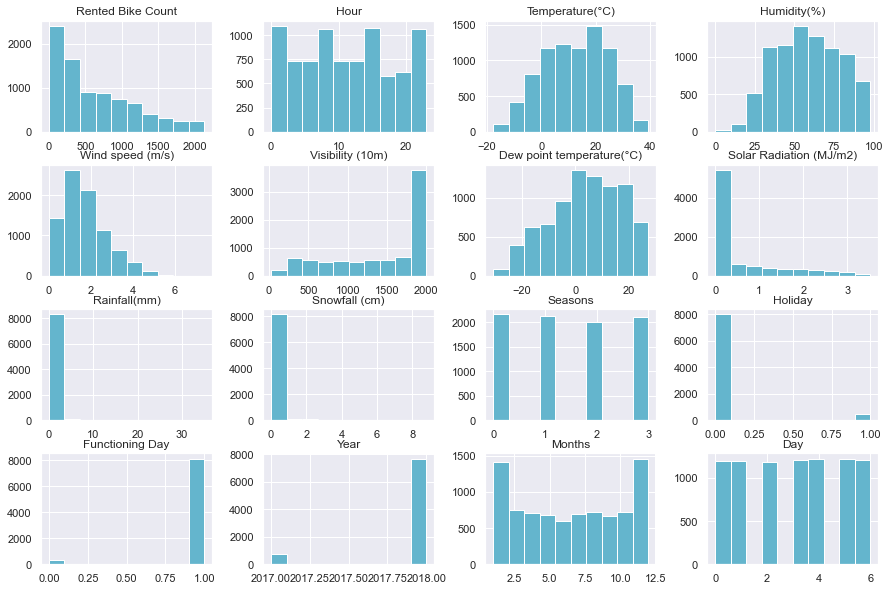

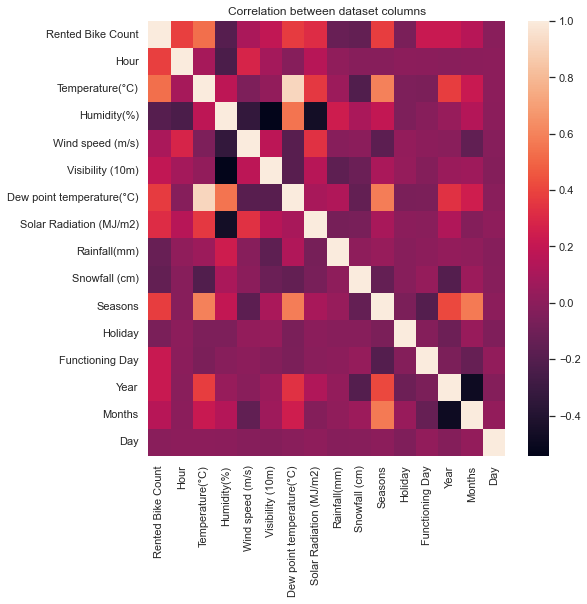

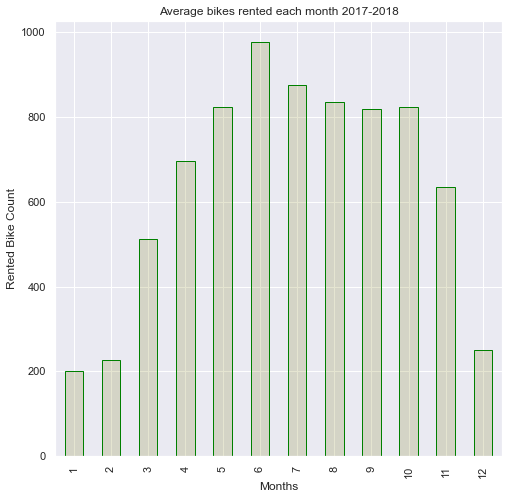

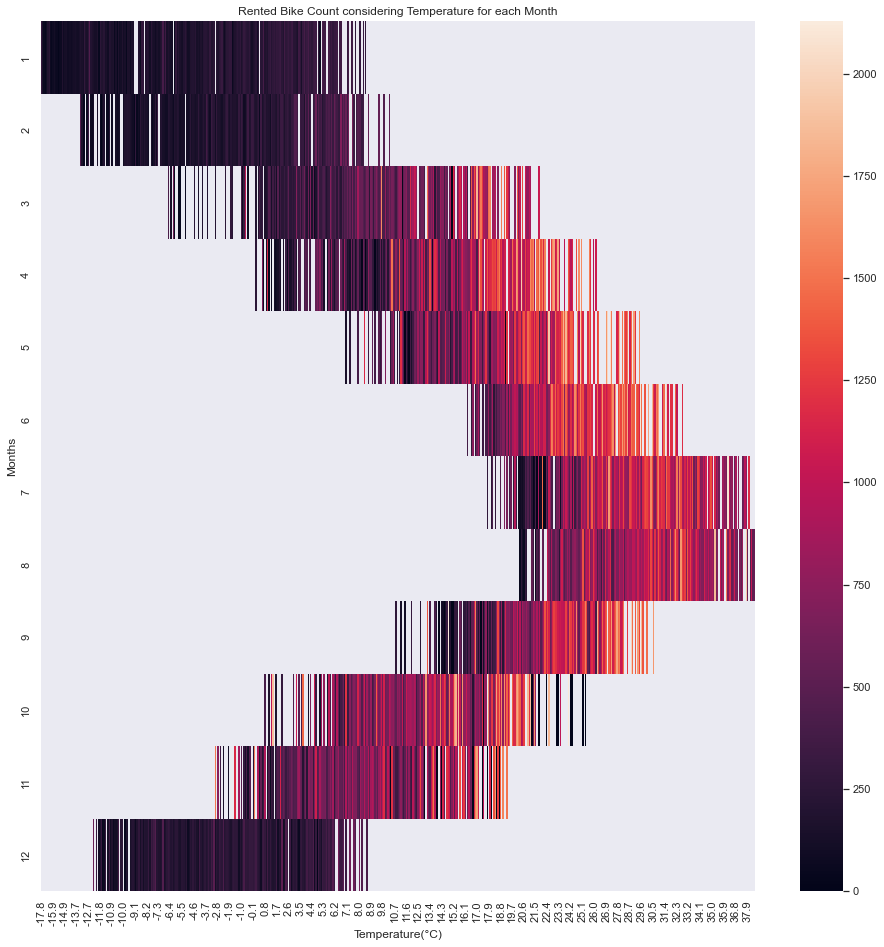

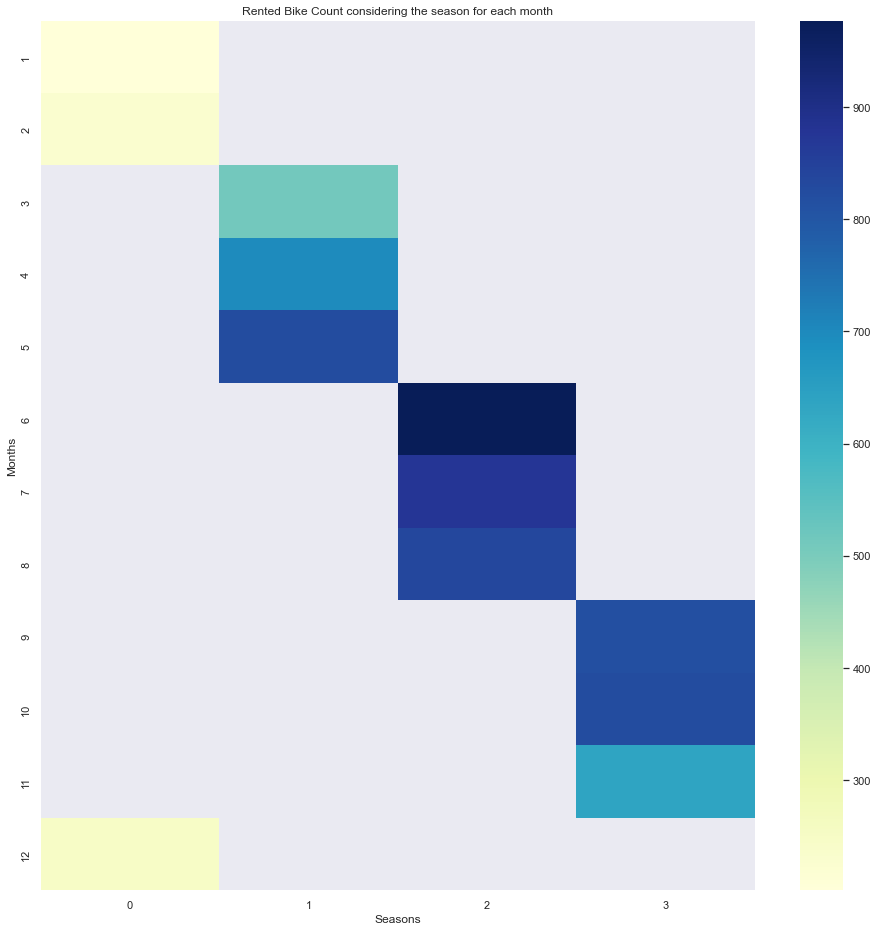

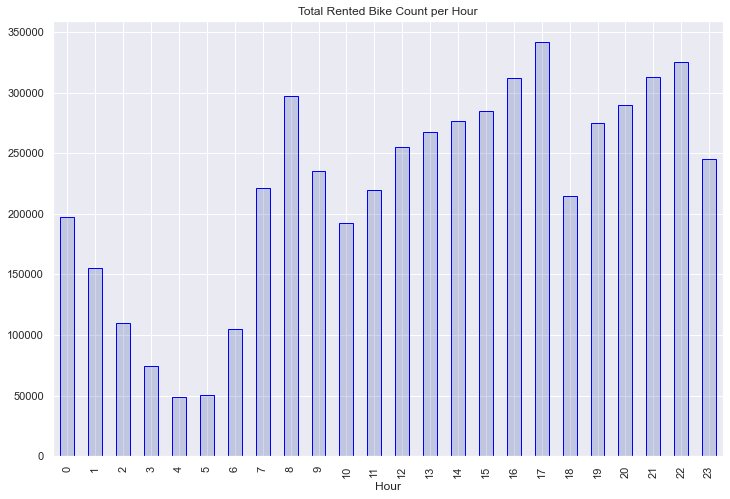

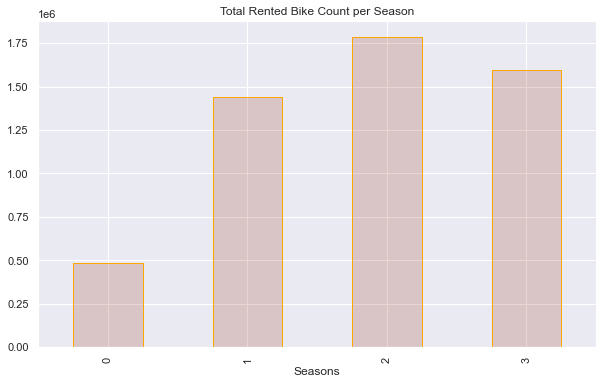

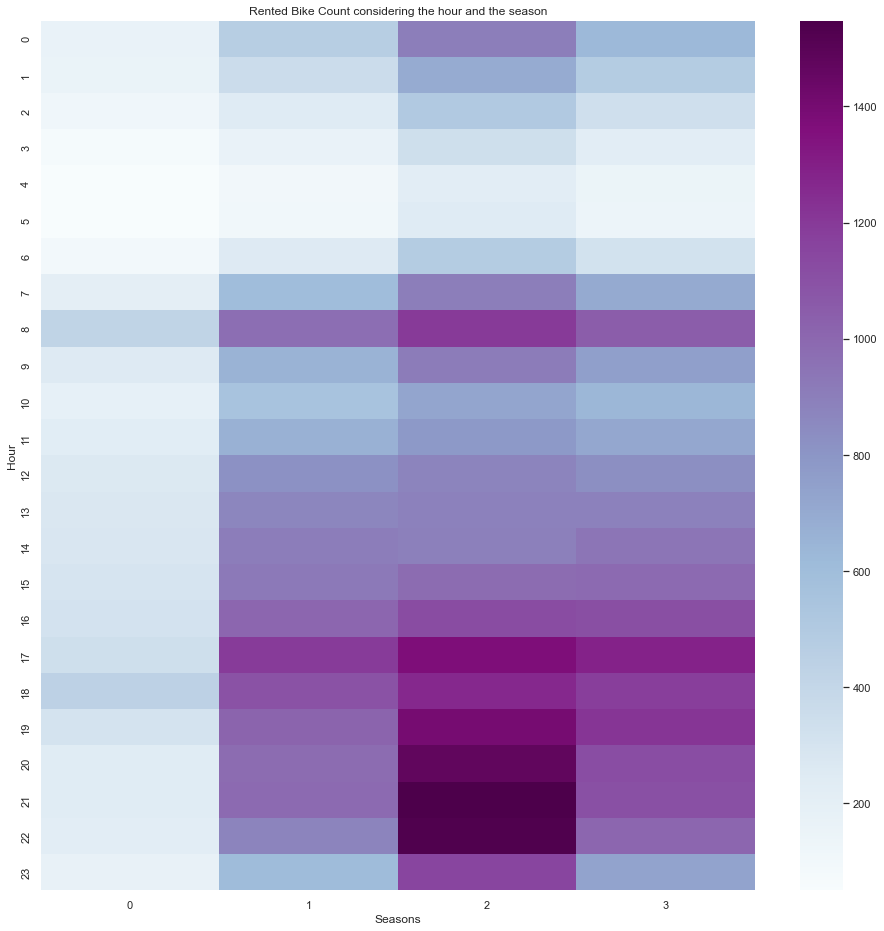

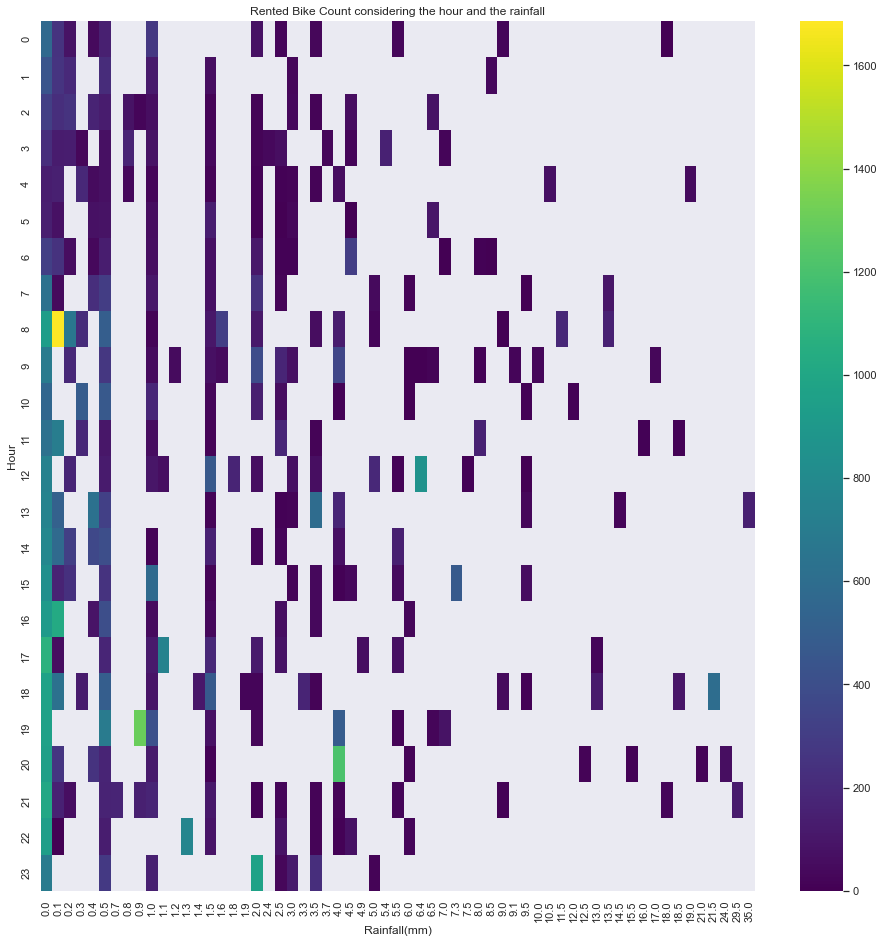

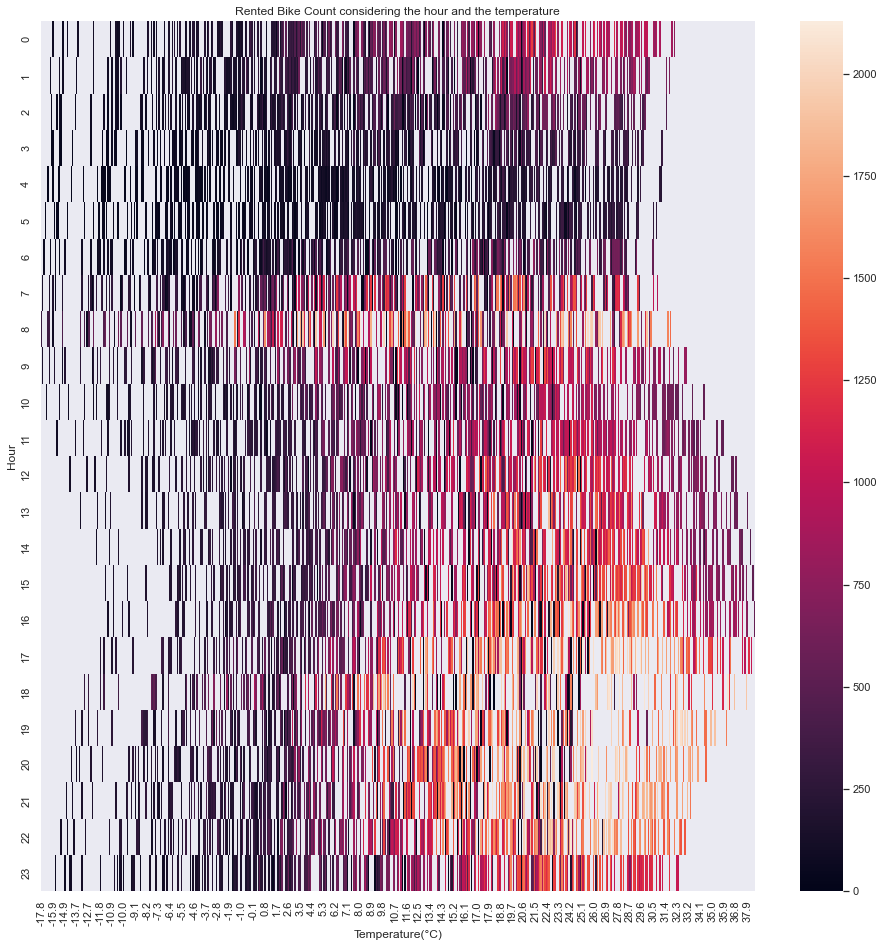

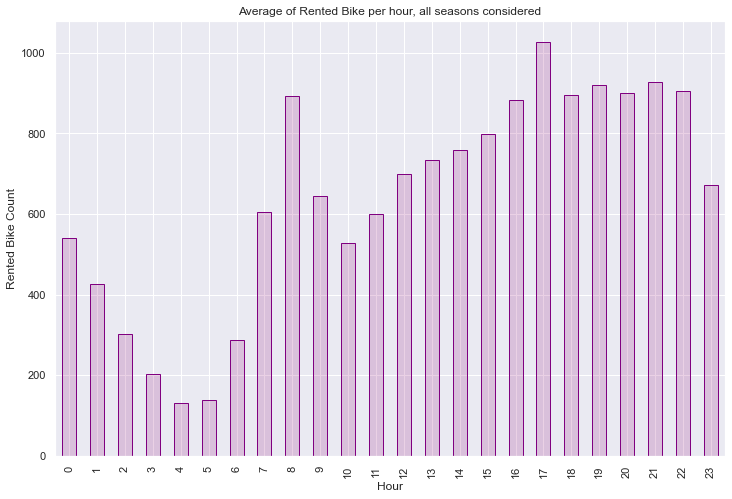

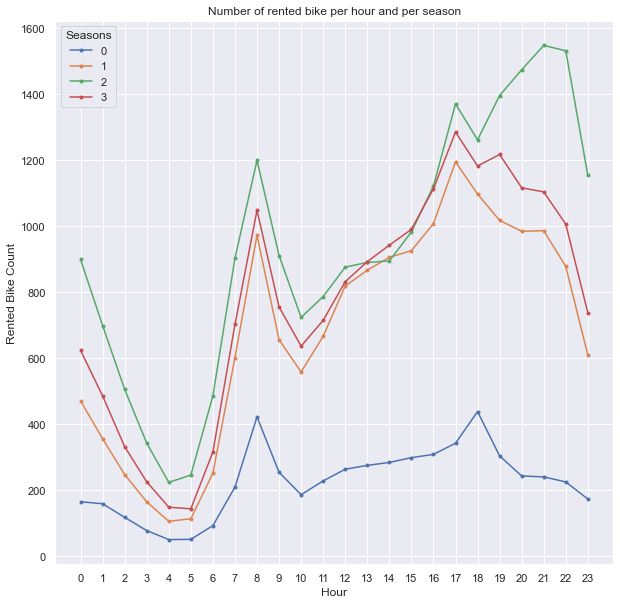

In [3]:
%run PDA_FinalProject_AnalysisPart.ipynb

In [4]:
df=pd.read_csv("SeoulBikeData.csv", encoding="ISO_8859-1")
df=cleaning_preparation(df)

C:\Users\willi\AppData\Local\Temp\ipykernel_12812\1598430227.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\willi\AppData\Local\Temp\ipykernel_12812\1598430227.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\willi\AppData\Local\Temp\ipykernel_12812\1598430227.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [5]:
df.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                        int64
Holiday                        int64
Functioning Day                int64
Year                           int64
Months                         int64
Day                            int64
dtype: object

## Now let's aply sklearn function to transform our data
        First we are going to separe categorical and numerical feature, then aplly MinMaxScaler on numerical feature and OrdinalEncoder on categorical

In [6]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  Year  \
0           0.0            0.0        0        0                1  2017   
1           0.0            0.0        0        0                1  2017   
2           0.0            0.0        0        0                1  2017   
3           0.0            0.0        0        0                1  2017   
4           0.0            0.0        0        0                1  2017   

   Months  Day  
0      12    4  
1      12    4  
2      12    4  
3      12    4  
4      12    4

In [7]:
target=df["Rented Bike Count"].copy()
data = df.drop(columns=["Rented Bike Count"])
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [8]:
target_train.head()

2513     411
4113    1118
7521    1097
1886     258
2458     428
Name: Rented Bike Count, dtype: int64

In [9]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
numerical_features = data.select_dtypes(include='number').columns.tolist()

In [10]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('OrdinalEncoder', OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1))
])

In [11]:
numeric_pipeline.fit_transform(data_train.select_dtypes(include='number'))

array([[0.73913043, 0.49912127, 1.        , ..., 1.        , 0.18181818,
        0.5       ],
       [0.39130435, 0.61862917, 0.2755102 , ..., 1.        , 0.36363636,
        0.        ],
       [0.39130435, 0.51845343, 0.73469388, ..., 1.        , 0.81818182,
        0.33333333],
       ...,
       [0.95652174, 0.8400703 , 0.6122449 , ..., 1.        , 0.54545455,
        0.        ],
       [0.86956522, 0.24780316, 0.52040816, ..., 1.        , 0.        ,
        0.66666667],
       [0.91304348, 0.52899824, 0.57142857, ..., 1.        , 0.81818182,
        0.83333333]])

In [12]:
preprocessor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_columns)],
                                 remainder='passthrough', sparse_threshold=0)

    Function for training a model after a grid search using a pipeline

In [13]:
def train_model(model):
    mod = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",
     model)])
    mod.fit(data_train, target_train)
    pred=mod.predict(data_test)
    return mod

# Let's try some models
## HistGradientBoost

In [15]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf",
     HistGradientBoostingRegressor())])

param_grid = {
    'clf__learning_rate': (0.4, 0.1),
    'clf__max_leaf_nodes': (54,58,60)}
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=2,scoring='neg_mean_absolute_error')
model_grid_search.fit(data_train, target_train)
model_grid_search.best_estimator_ 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Hour', 'Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Dew point temperature(°C)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfal

In [16]:
model = HistGradientBoostingRegressor(random_state=42, max_leaf_nodes=60,learning_rate=0.4)
trainmodel =train_model(model)
pred = trainmodel.predict(data_test)

In [17]:
HistGradientBoost_model_grid_search_best_score_=abs(model_grid_search.best_score_)
HistGradientBoost_mean_absolute_error= mean_absolute_error(target_test, pred)
HistGradientBoost_trainmodel_score=trainmodel.score(data_test,target_test)

In [20]:
print("Mean absolute error :", HistGradientBoost_mean_absolute_error,", score model :",HistGradientBoost_trainmodel_score)

Mean absolute error : 88.67704601604116 , score model : 0.9318095937513966


### Visualisation HistGradientBoost

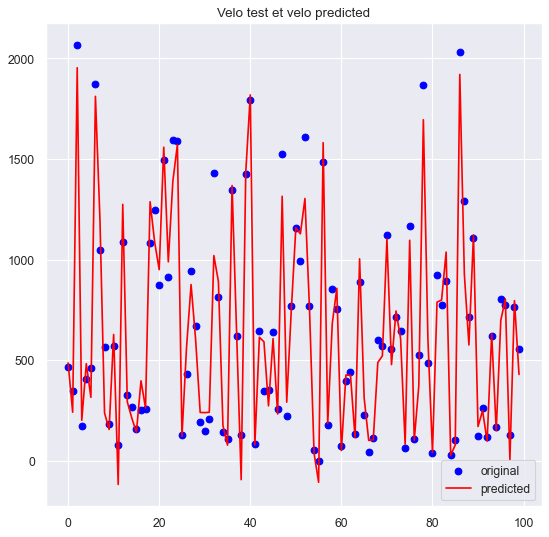

In [21]:
targ = target_test[0:100]
y= pred[0:100]
figure(figsize=(8, 8), dpi=80)
x_ax = range(len(targ))
plt.scatter(x_ax, targ, label="original", color = 'blue')
plt.plot(x_ax, y, label="predicted", color = 'red')
plt.title("Velo test et velo predicted")
plt.legend()
plt.show()

## Bayesian Ridge Model

In [22]:
param_grid = {
    'clf__n_iter': (100,300,600),
    'clf__alpha_1': (1.e-7,1.e-6,1.e-5), 
    'clf__lambda_1': (1.e-7,1.e-6,1.e-5)}

model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf",
     linear_model.BayesianRidge())])

model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=2,scoring='neg_mean_absolute_error')
model_grid_search.fit(data_train, target_train)
model_grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Hour', 'Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Dew point temperature(°C)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfal

In [23]:
model = linear_model.BayesianRidge(alpha_1 = 1.e-7,lambda_1 = 1.e-5, n_iter=100)
trainmodel = train_model(model)
pred = trainmodel.predict(data_test)

In [24]:
BayesianRidge_model_grid_search_best_score_=abs(model_grid_search.best_score_)
BayesianRidge_mean_absolute_error= mean_absolute_error(target_test, pred)
BayesianRidge_trainmodel_score=trainmodel.score(data_test,target_test)

In [25]:
print("Mean absolute error,score model : ", mean_absolute_error(target_test, pred),trainmodel.score(data_test,target_test))

Mean absolute error,score model :  270.1722004369432 0.5759260019462856


### Bayesian Ridge Model Visualisation

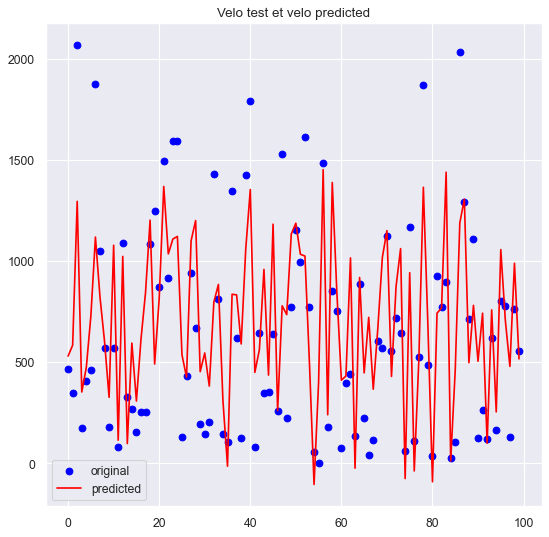

In [26]:
targ = target_test[0:100]
y= pred[0:100]
figure(figsize=(8, 8), dpi=80)
x_ax = range(len(targ))
plt.scatter(x_ax, targ, label="original", color = 'blue')
plt.plot(x_ax, y, label="predicted", color = 'red')
plt.title("Velo test et velo predicted")
plt.legend()
plt.show()

## SVR MODEL

In [27]:
param_grid = {'clf__C': [1000,2000], 
              'clf__gamma': [ 0.001, 0.0001],
              'clf__kernel': ['rbf']} 
model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf",
     SVR())])
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,scoring='neg_mean_absolute_error')
grid.fit(data_train, target_train)
grid.best_estimator_ 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END clf__C=1000, clf__gamma=0.001, clf__kernel=rbf;, score=-289.525 total time=   2.1s
[CV 2/5] END clf__C=1000, clf__gamma=0.001, clf__kernel=rbf;, score=-303.208 total time=   2.0s
[CV 3/5] END clf__C=1000, clf__gamma=0.001, clf__kernel=rbf;, score=-319.012 total time=   2.1s
[CV 4/5] END clf__C=1000, clf__gamma=0.001, clf__kernel=rbf;, score=-285.487 total time=   1.9s
[CV 5/5] END clf__C=1000, clf__gamma=0.001, clf__kernel=rbf;, score=-300.574 total time=   1.9s
[CV 1/5] END clf__C=1000, clf__gamma=0.0001, clf__kernel=rbf;, score=-369.825 total time=   2.0s
[CV 2/5] END clf__C=1000, clf__gamma=0.0001, clf__kernel=rbf;, score=-379.148 total time=   2.0s
[CV 3/5] END clf__C=1000, clf__gamma=0.0001, clf__kernel=rbf;, score=-401.369 total time=   2.0s
[CV 4/5] END clf__C=1000, clf__gamma=0.0001, clf__kernel=rbf;, score=-363.344 total time=   2.0s
[CV 5/5] END clf__C=1000, clf__gamma=0.0001, clf__kernel=rbf;, score=-39

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Hour', 'Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Dew point temperature(°C)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfal

In [28]:
model = SVR(C=2000,gamma=0.001)
trainmodel = train_model(model)
pred = trainmodel.predict(data_test)

In [29]:
SVR_model_grid_search_best_score_=abs(grid.best_score_)
SVR_mean_absolute_error= mean_absolute_error(target_test, pred)
SVR_trainmodel_score=trainmodel.score(data_test,target_test)

In [30]:
print("Mean absolute error,score model : ", mean_absolute_error(target_test, pred),trainmodel.score(data_test,target_test))

Mean absolute error,score model :  271.8103965274327 0.49470278776296994


### SVR Visualisation Modele

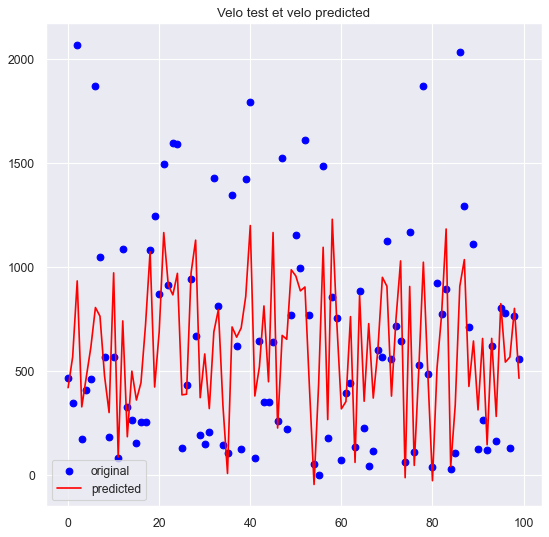

In [31]:
targ = target_test[0:100]
y= pred[0:100]
figure(figsize=(8, 8), dpi=80)
x_ax = range(len(targ))
plt.scatter(x_ax, targ, label="original", color = 'blue')
plt.plot(x_ax, y, label="predicted", color = 'red')
plt.title("Velo test et velo predicted")
plt.legend()
plt.show()

## RandomForestRegressor MODEL

In [52]:
# Create the random grid
param_grid = {
    'clf__max_depth': [150],
    'clf__max_features': [3,5],
    'clf__min_samples_leaf': [1, 2],
    'clf__min_samples_split': [2, 5],
    'clf__n_estimators': [2000]
}

model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf",
     RandomForestRegressor())])

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_absolute_error')

grid_search.fit(data_train, target_train)
grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'clf__max_depth': 150,
 'clf__max_features': 5,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 2000}

In [53]:
model = RandomForestRegressor(max_depth=150,max_features=5,min_samples_leaf=1,min_samples_split=2,n_estimators=2000)
trainmodel = train_model(model)
pred = trainmodel.predict(data_test)

In [34]:
RandomForestRegressor_model_grid_search_best_score_=abs(grid_search.best_score_)
RandomForestRegressor_mean_absolute_error= mean_absolute_error(target_test, pred)
RandomForestRegressor_trainmodel_score=trainmodel.score(data_test,target_test)

In [35]:
print("Mean absolute error,score model : ", mean_absolute_error(target_test, pred),trainmodel.score(data_test,target_test))

Mean absolute error,score model :  97.69201906007291 0.9201404925895792


### Partie Visualisation Random Forest Regressor Model

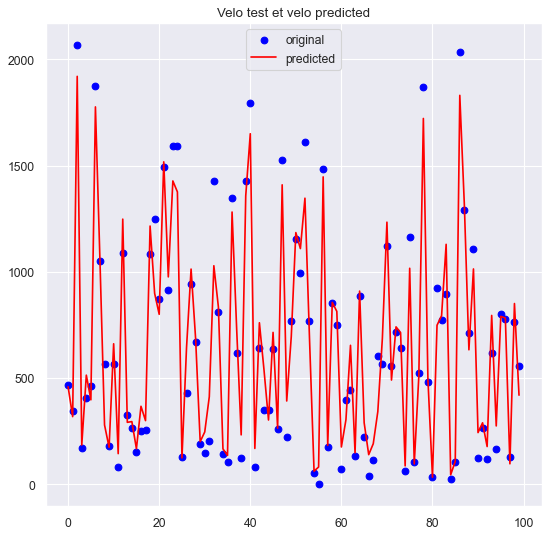

In [36]:
targ = target_test[0:100]
y= pred[0:100]
figure(figsize=(8, 8), dpi=80)
x_ax = range(len(targ))
plt.scatter(x_ax, targ, label="original", color = 'blue')
plt.plot(x_ax, y, label="predicted", color = 'red')
plt.title("Velo test et velo predicted")
plt.legend()
plt.show()

## Gradient Boosting Regressor Model

In [55]:
params = {
    "clf__n_estimators": [1000],
    "clf__max_depth": (6,7),
    "clf__subsample": [0.6,0.5],
    "clf__learning_rate": (0.01,0.1)
}

model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf",
     GradientBoostingRegressor())])

grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_absolute_error')

grid_search.fit(data_train, target_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('number',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['Hour',
                                                                          'Temperature(°C)',
                                                                          'Humidity(%)',
 

In [56]:
grid_search.best_estimator_ 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Hour', 'Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Dew point temperature(°C)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfal

In [57]:
model = GradientBoostingRegressor(learning_rate = 0.01, max_depth=7,n_estimators=1000,subsample=0.6)
trainmodel = train_model(model)
pred = trainmodel.predict(data_test)

In [58]:
GradientBoostingRegressor_model_grid_search_best_score_=abs(grid_search.best_score_)
GradientBoostingRegressor_mean_absolute_error= mean_absolute_error(target_test, pred)
GradientBoostingRegressor_trainmodel_score=trainmodel.score(data_test,target_test)

In [59]:
print("Mean absolute error,score model : ", GradientBoostingRegressor_mean_absolute_error,GradientBoostingRegressor_trainmodel_score)

Mean absolute error,score model :  77.22997848300558 0.9446921855760235


### Partie Visualisation Gradient Boosting

In [42]:
targ = target_test[0:100]
y= pred[0:100]

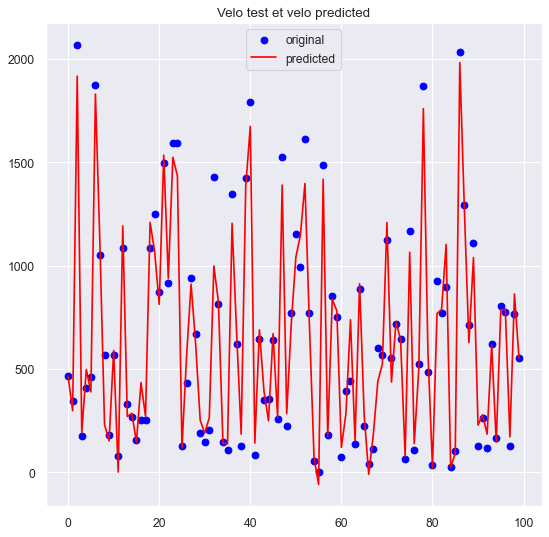

In [60]:
figure(figsize=(8, 8), dpi=80)
x_ax = range(len(targ))
plt.scatter(x_ax, targ, label="original", color = 'blue')
plt.plot(x_ax, y, label="predicted", color = 'red')
plt.title("Velo test et velo predicted")
plt.legend()
plt.show()

# Comparaison des models

In [61]:
d={'HistGradientBoost': [HistGradientBoost_model_grid_search_best_score_,
                         HistGradientBoost_mean_absolute_error,
                         HistGradientBoost_trainmodel_score],
   'BayesianRidge': [BayesianRidge_model_grid_search_best_score_,
                     BayesianRidge_mean_absolute_error,
                     BayesianRidge_trainmodel_score],
   'SVR' : [SVR_model_grid_search_best_score_,
            SVR_mean_absolute_error,
            SVR_trainmodel_score],
   'RandomForestRegressor' : [RandomForestRegressor_model_grid_search_best_score_,
                              RandomForestRegressor_mean_absolute_error,
                              RandomForestRegressor_trainmodel_score],
   'GradientBoostingRegressor': [GradientBoostingRegressor_model_grid_search_best_score_,
                                 GradientBoostingRegressor_mean_absolute_error,
                                 GradientBoostingRegressor_trainmodel_score]  
  }

In [62]:
df_compraison=pd.DataFrame(d, index = ['model_grid_search_best_score_', 'mean_absolute_error', 'trainmodel_score'])

In [63]:
df_compraison=df_compraison.stack(0).unstack(0)

In [64]:
df_compraison=df_compraison.sort_values(by='trainmodel_score',ascending=False)
df_compraison

model_grid_search_best_score_  mean_absolute_error  \
GradientBoostingRegressor                      88.189836            77.229978   
HistGradientBoost                              96.003059            88.677046   
RandomForestRegressor                         114.097867            97.692019   
BayesianRidge                                 280.103409           270.172200   
SVR                                           288.102496           271.810397   

                           trainmodel_score  
GradientBoostingRegressor          0.944692  
HistGradientBoost                  0.931810  
RandomForestRegressor              0.920140  
BayesianRidge                      0.575926  
SVR                                0.494703

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=df_compraison.index,
    y=df_compraison["trainmodel_score"],
    name='Train model accuracy',
    marker_color='grey'
),
              secondary_y=True,)

fig.add_trace(go.Bar(
    x=df_compraison.index,
    y=df_compraison["mean_absolute_error"],
    name='Mean absolute error after testing',
    marker_color='indianred'
),
              secondary_y=False,)

fig.add_trace(go.Bar(
    x=df_compraison.index,
    y=df_compraison["model_grid_search_best_score_"],
    name='Mean absolute error after grid search',
    marker_color='lightsalmon',
),
              secondary_y=False,)

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(
        title="<b>Comparaison</b> between models",
        xaxis_title="Model name",
        legend_title="Legend",
        font=dict(
            family="Calibri",
            size=15,
            color="Black"
        )
    )
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="Mean absolute error", secondary_y=False)
fig.update_yaxes(title_text="Model error", secondary_y=True)
fig.show()

## Conclusion        
        Thanks to this comparaison part the gradient bosting regressor is the best model to predict the number of lend bike in Seoul
        It is now possible to determine with an average of """" the number of bikes rented in Seoul hour by hour

## Prediction
    Now let's make a prediction using the GradientBoostingRegressor

À Séoul at 9 am the 06/12/2022 the weather condition according to "accuweather.com" where :

In [69]:
data_prediction={
    "Hour":[9],
    "Temperature(°C)":[1.],
    "Humidity(%)":[68],
    "Wind speed (m/s)":[1.1],
    "Visibility (10m)":[2000],
    "Dew point temperature(°C)":[-5.],
    "Solar Radiation (MJ/m2)":[0.0],
    "Rainfall(mm)":[0.0],
    "Snowfall (cm)":[0.0],
    "Seasons":[3],
    "Holiday":[0],
    "Functioning Day":[1],
    "Year":[2022],
    "Months":[12],
    "Day":[6]
}

In [70]:
data_prediction=pd.DataFrame(data_prediction)

In [71]:
model = GradientBoostingRegressor(learning_rate = 0.01, max_depth=7,n_estimators=1000,subsample=0.6)
trainmodel = train_model(model)
pred = trainmodel.predict(data_prediction)
print(round(pred[0]))

457


In [ ]:
f'The model is able to make prediction of the number of rented bike in Seoul. It predict that this number will be of {round(pred[0])} the 6 december 2022 at 9 am'